<h1 align=center style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Adding New Features
</font>
</h1>

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
The Beijing housing dataset provides us with very useful information, but sometimes we can generate new features using the existing ones. For example, by having the area and the total price of each house, we can calculate the price per square meter for each house, which is an important feature in real estate analysis. In this part of the project, we will add two new features to our dataset and then start drawing charts to examine the relationships between them using visualization tools.
</font>
</p>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Dataset
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
First, we read the dataset file <code>housing_no_outlier_full.csv</code>.
</font>
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing_no_outlier = pd.read_csv('housing_no_outlier.csv', encoding='gbk')
housing_no_outlier.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part One
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
One of the exciting tasks you can do in such analyses is to create new features based on existing ones. However, this should only be done if the new feature is considered useful.
As the first step, we want to calculate the distance of each house to the center of the capital of China and store it in a column named <code>distanceToCapital</code>.
The longitude and latitude of the center of the capital of China are <code>116.4074</code> and <code>39.9042</code>, respectively.
You can use the formula below to calculate the distance.
Remember that in the calculations, all angles must be converted to radians. We will name the new dataframe that includes this column <code>housing_capital</code>.
<br>
</font>
</p>


$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$ 
$$ λ: \text{longitude} $$ 

In [2]:
from math import radians
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

distances_in_radian=housing_no_outlier.copy()
distances_in_radian["Lng"]=distances_in_radian["Lng"].apply(radians)
distances_in_radian["Lat"]=distances_in_radian["Lat"].apply(radians)
housing_capital = housing_no_outlier.copy()
housing_capital['distanceToCapital'] = np.arccos(np.sin(distances_in_radian["Lat"])*np.sin(capital_Lat)+
                                              np.cos(distances_in_radian["Lat"])*np.cos(capital_Lat)*
                                              np.cos(distances_in_radian["Lng"]-capital_Lng))*6371.0088

housing_capital.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Two
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In this dataset, the transaction price and the area of each house are specified. However, the price per square meter is not. We will calculate and store the price per square meter in the column <code>pricePerSquare</code>. Note that the total price is based on <i>million yuan</i>. Therefore, the price we calculate for each square meter should be multiplied by one thousand to obtain the price in <i>yuan</i>. We will name the resulting dataframe <code>housing_PPS</code>.
</font>
</p>


In [3]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = (housing_PPS["totalPrice"]/housing_PPS["square"])*1000

housing_PPS.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
We want to use various data visualization methods to extract information that meets our needs. Our dataset has no missing values, no outliers, and no columns stored in an inappropriate format. As a first step, let's look at the histogram of the numerical columns.
<br>
To create a table of histograms for all numerical columns, we need to use the <code>hist</code> function. Note that the <code>hist</code> function differs from what we saw in the pandas interface tutorials. <code>plot(kind='hist')</code> would draw the histogram for all columns on one axis, but the <code>hist</code> function draws separate axes for each column.
</font>
</p>


C:\Users\Patience&Persistence\AppData\Local\Temp\ipykernel_22968\60454985.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_PPS.hist(ax = ax, bins = 20);


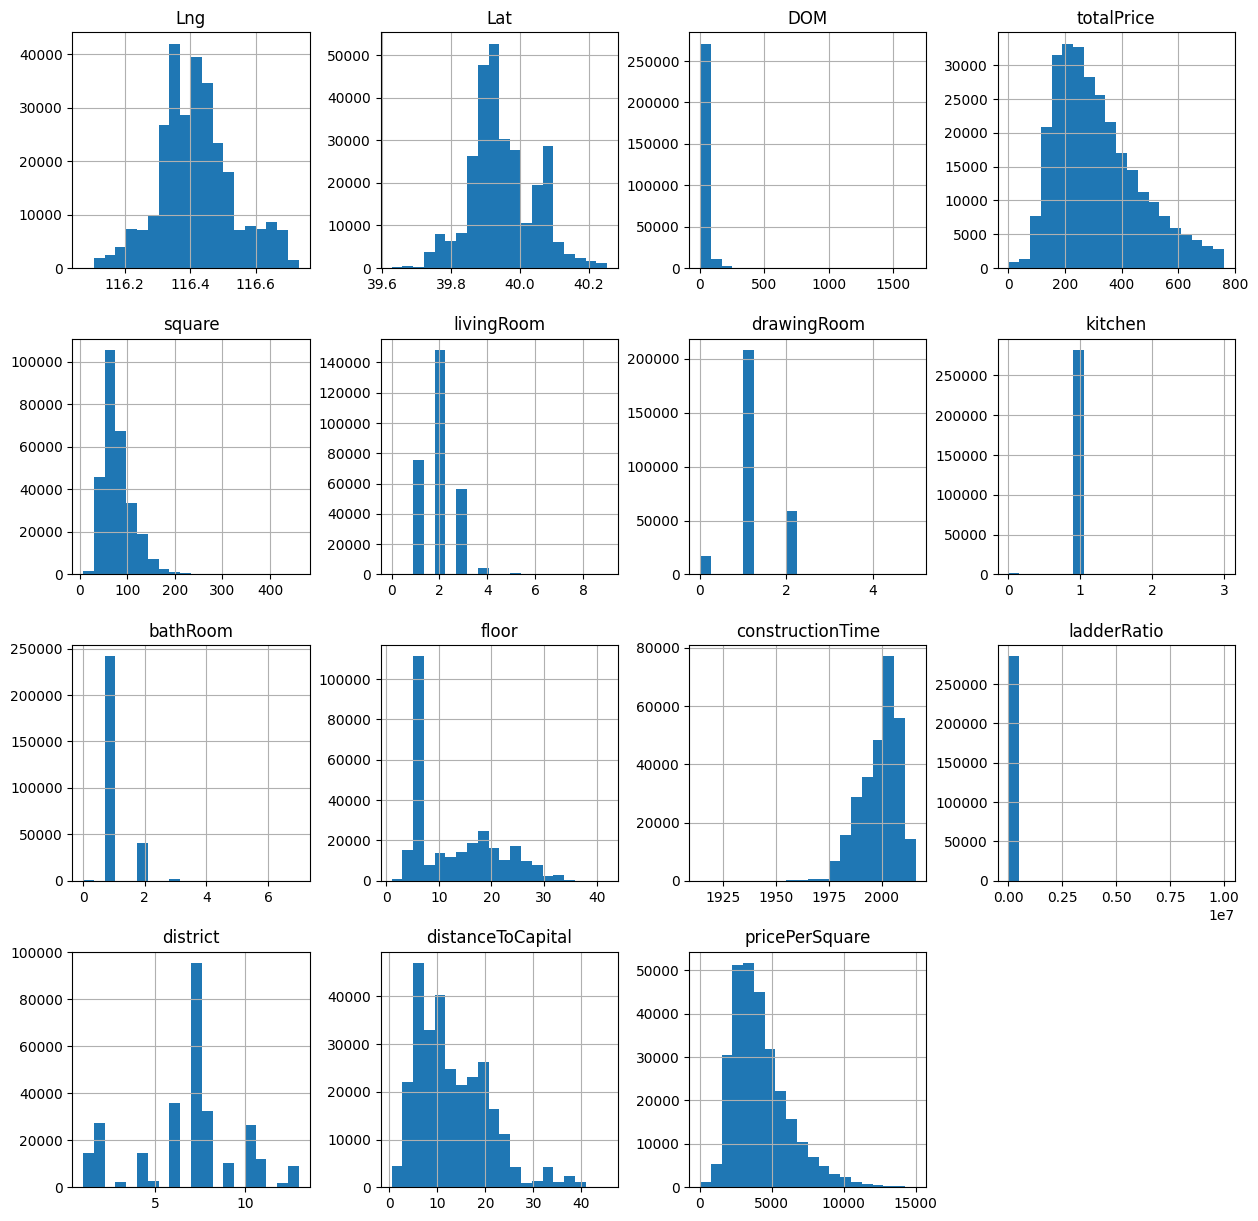

In [4]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
According to the above chart, house prices have a skew towards 200 million yuan. Most houses were built around the year 2000. The maximum distance from the center of the capital is 40 kilometers. Most houses have two living rooms. More information can be extracted from this chart.
</font>
</p>


<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Investigating the Effect of Distance from the Center on Price per Square Meter
</font>
</h2>


<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
We want to use the new column we created to see how the price per square meter changes as we move away from the city center. For this, we can use the <code>regplot</code> from Seaborn, which not only displays the points but also shows the data trend with regression.
</font>
</p>


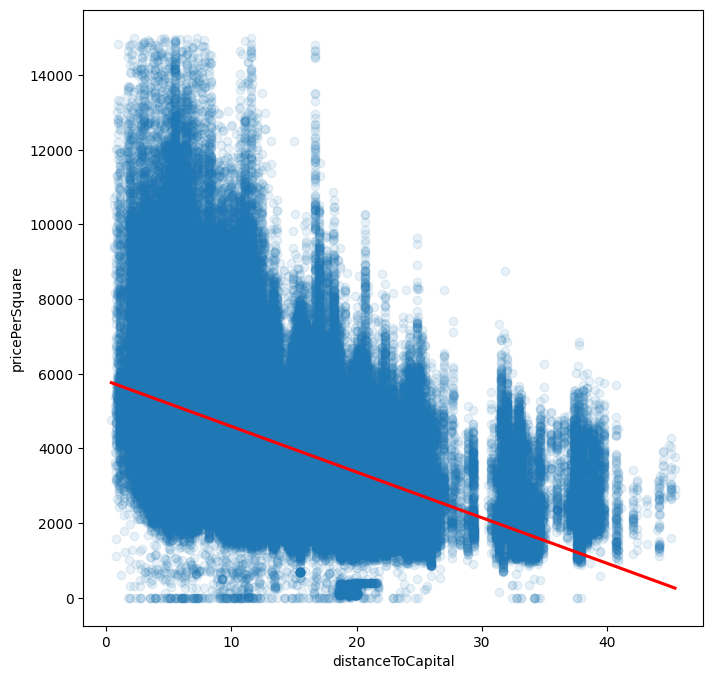

In [5]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Part Three
</font>
</h2>
<p dir=ltr style="direction: ltr;text-align: justify;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
In this section, we want to examine how having an elevator affects the
<b>
 price per square meter
</b>
 of houses. There are various charts we can use for this analysis. For example, we can use a bar chart to compare the average price of houses with and without elevators, or a box plot to show the price distribution. We will use a density plot for the comparison.
<br>
<ul style="direction: ltr;text-align: left;">
  <li>
First, create a figure with one axis and set the figure's width and height to 6 inches.
</li>
  <li>
Using the pandas interface, plot the price distribution estimate for houses without an elevator. Plot this on the axis created in the previous step.
</li>
  <li>
Then, plot the price distribution estimate for houses with an elevator on the same axis.
</li>
  <li>
Adjust the settings so that the output matches the figure below. The colors used are:
<ul>
<li>
Title color: <code>red</code>
</li>
<li>
Axis background color: <code>#ffffcc</code>
</li>
<li>
Figure background color: <code>khaki</code>
</li>
</ul>
</font>
</p>


<p style="text-align:center;"><img src="output.png"></p>

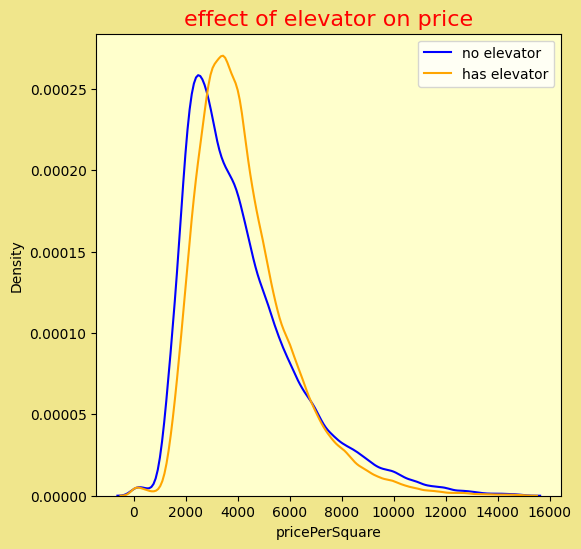

In [6]:

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

# Set the custom style
fig.patch.set_facecolor('khaki')
ax.set_facecolor('#ffffcc')

sns.kdeplot(data=housing_PPS[housing_PPS['elevator'] == 'no elevator']['pricePerSquare'], 
            color='blue', label='no elevator', ax=ax)
sns.kdeplot(data=housing_PPS[housing_PPS['elevator'] == 'has elevator']['pricePerSquare'], 
            color='orange', label='has elevator', ax=ax)

# Labels, Title, and Legend
ax.set_xlabel('pricePerSquare')
ax.set_ylabel('Density')
ax.set_title('effect of elevator on price', color='red', fontsize=16)
ax.legend()

plt.show()


<p dir=ltr style="direction: ltr;text-align: left;line-height:200%;font-family=vazir;font-size=medium">
<font face="vazir" size=3>
We will save the final dataframe in a file named <code>housing_extended.csv</code> for use in the subsequent steps of the project.
</font>
</p>


In [7]:
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)

<h2 align=right style="line-height:200%;font-family=vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>Answer Cell</b>
</font>
</h2>

<p dir=ltr style="direction: ltr; text-align: justify; line-height:200%; font-family=vazir; font-size:medium">
<font face="vazir" size=3>
    To create the file <code>result.zip</code>, run the cell below. Ensure that any changes made in the notebook are saved (<code>ctrl+s</code>) before running it, so that our code can be reviewed if support is needed.
</font>
</p>


In [8]:
import zipfile
import joblib
import nbformat as nbf

ntbk = nbf.read("3_add_new_features.ipynb", nbf.NO_CONVERT)
new_ntbk = ntbk
for cell in ntbk.cells:
    cell['outputs']=[]
nbf.write(new_ntbk, "3_add_new_features_no_output.ipynb", version=nbf.NO_CONVERT)

housing_capital.head(100).to_csv("housing_capital.csv") 
housing_PPS.head(100).to_csv("housing_PPS.csv")
joblib.dump(fig, "fig")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["housing_capital.csv", "housing_PPS.csv", "fig", '3_add_new_features_no_output.ipynb']
compress(file_names)

File Paths:
['housing_capital.csv', 'housing_PPS.csv', 'fig', '3_add_new_features_no_output.ipynb']
